In [2]:
from helpers import load_csv_data

data_folder = './data/dataset/'
x_train, x_test, y_train, train_ids, test_ids = load_csv_data(data_folder, sub_sample=True)

from implementations import normalize
x_train, x_test = normalize(x_train, x_test)

## Test of the algorithms on a linear regression between 2 features

Weights from GD:  [-5.59552404e-17  9.32186343e-01]
Weights from SGD:  [0.05100737 0.88591589]
Weights from LS:  [8.90855495e-18 9.32211103e-01]
Weights from Ridge:  [2.65307026e-19 7.76842586e-01]


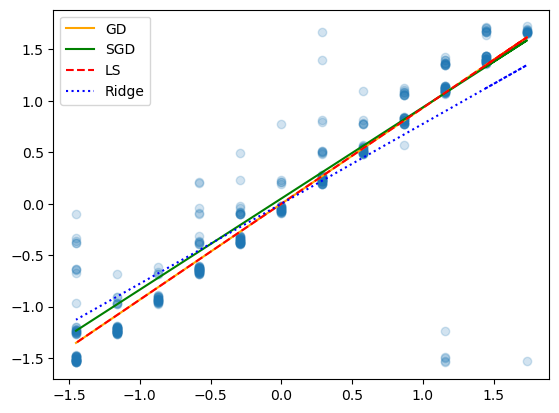

In [ ]:
# We observe that features 1 and 2 are correlated
# Let's test our algorithms on these two features only

import numpy as np
from matplotlib import pyplot as plt
from implementations import mean_squared_error_gd, mean_squared_error_sgd, least_squares

tx = np.ones((x_train.shape[0], 2))
tx[:, 1] = x_train[:, 1]

w_gd, _ = mean_squared_error_gd(x_train[:,2], tx, np.array([0., 0.]), max_iters=100, gamma=0.1)
w_sgd, _ = mean_squared_error_sgd(x_train[:,2], tx, np.array([0., 0.]), max_iters=10000, gamma=0.1)
w_ls, _ = least_squares(x_train[:,2], tx)

print("Weights from GD: ", w_gd)
print("Weights from SGD: ", w_sgd)
print("Weights from LS: ", w_ls)

plt.scatter(x_train[:, 1], x_train[:, 2], alpha=0.2)
plt.plot(x_train[:, 1], tx @ w_gd, label='GD', color='orange')
plt.plot(x_train[:, 1], tx @ w_sgd, label='SGD', color='green')
plt.plot(x_train[:, 1], tx @ w_ls, label='LS', color='red', linestyle='dashed')
plt.legend()